# Copper price prediction

### Importing necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from pandas import DataFrame
import os
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')
from pmdarima import auto_arima
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA

### Data Loading

In [2]:
df=pd.read_csv(r"C:\Users\manishkolambe\Downloads\copper.csv")

### Data preprocessing

In [3]:
df.drop(["Open","High","Low","Date","Volume"],axis=1,inplace=True)

### Data Info

In [4]:
df.head()

,Close
0,3.8650
1,3.9645
2,3.9865
3,4.0325
4,4.0810


In [5]:
df.shape

(329, 1)

In [6]:
df.describe()

,Close
count,329.000000
mean,4.014953
std,0.432879
min,3.211500
25%,3.624500
50%,4.039000
75%,4.382500
max,4.937500


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   329 non-null    float64
dtypes: float64(1)
memory usage: 2.7 KB


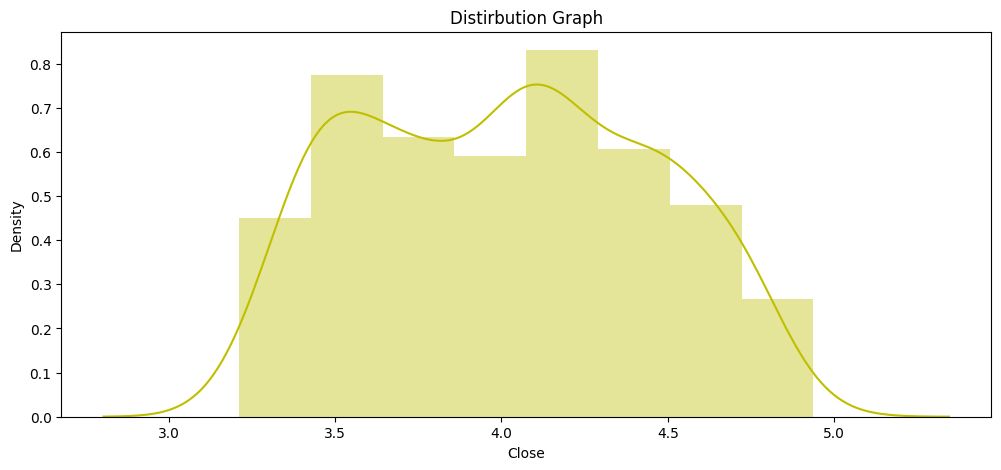

In [8]:
plt.figure(figsize=(12,5))
plt.title("Distirbution Graph")
ax = sns.distplot(df["Close"], color = 'y')

### Statistical Test

In [9]:
dftest = adfuller(df.Close, autolag = 'AIC')
    
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression:",dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
     print("\t",key, ": ", val)

1. ADF :  -1.1551046434275845
2. P-Value :  0.6926044839649774
3. Num Of Lags :  2
4. Num Of Observations Used For ADF Regression: 326
5. Critical Values :
	 1% :  -3.4505694423906546
	 5% :  -2.8704469462727795
	 10% :  -2.5715154495841017


### Arima model

In [10]:
stepwise_fit = auto_arima(df['Close'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-839.354, Time=0.58 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-838.889, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-837.714, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-837.938, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-840.679, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-842.779, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-837.552, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-840.955, Time=0.47 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-839.729, Time=0.24 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-839.549, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-844.580, Time=0.40 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-839.750, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-839.522, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-839.326, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[0]          

Splitting the data into train and test data

In [11]:
X = df.values
size = int(len(X) * 0.7)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

In [12]:
train.shape

(230, 1)

In [13]:
test.shape

(99, 1)

Fitting the ARIMA model

In [14]:
for t in range(len(test)):
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
preddf=pd.DataFrame(predictions,index=[x for x in range(230,329)])

RMSE

In [15]:
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)


Test RMSE: 0.075


### Data Visualization

Actual price movement vs Predicted price movement

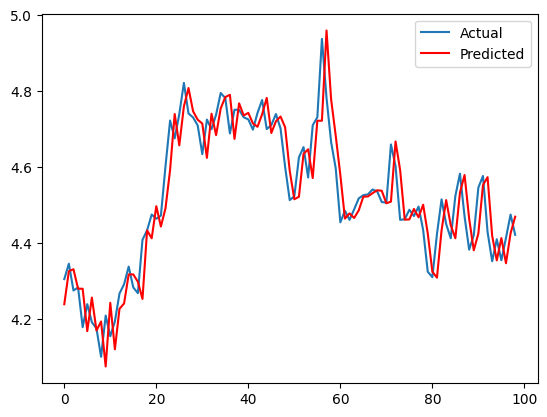

In [16]:
pyplot.plot(test,label="Actual")
pyplot.plot(predictions, color='red',label="Predicted")
pyplot.legend()
pyplot.show()

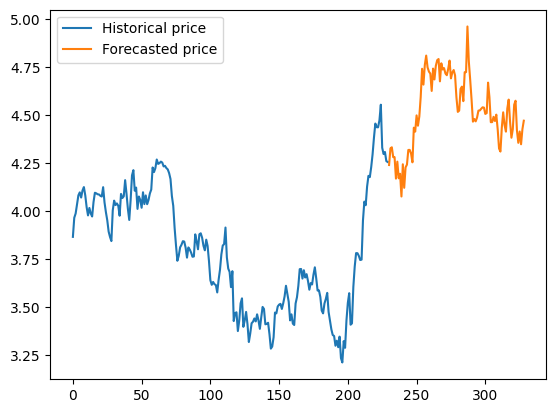

In [17]:
pyplot.plot(train,label="Historical price")
pyplot.plot(preddf,label="Forecasted price")
pyplot.legend()
pyplot.show()